In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#pre-processing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [4]:
train = pd.read_csv('train.csv')
train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [5]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
test = pd.read_csv('test.csv')
test.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
5,1000013,P00350442,M,46-50,1,C,3,1,2,3.0,15.0
6,1000013,P00155442,M,46-50,1,C,3,1,1,11.0,15.0
7,1000013,P0094542,M,46-50,1,C,3,1,2,4.0,9.0
8,1000015,P00161842,M,26-35,7,A,1,0,10,13.0,16.0
9,1000022,P00067942,M,18-25,15,A,4+,0,5,14.0,NaN


In [7]:
test.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [8]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [10]:
train.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
train.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [12]:
train.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

We have to pre-process the following tasks:
* Also impute the missing values

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [14]:
dumb_train = train.copy()

age_bin_dict = {"0-17":"Children", "55+":"Old2", "26-35":"Adult1", "46-50":"Adult3", "51-55":"Old1", "36-45":"Adult2", "18-25":"Young Adult"}
train = train.replace({'Age':age_bin_dict})
train.Age.head(10)

test = test.replace({'Age':age_bin_dict})
test.Age.head(10)

In [15]:
test.Product_Category_2.mode()[0]

8.0

In [16]:
#Let us simply impute missing values using mode in category 2 and 3
train['Product_Category_2'] = train['Product_Category_2'].fillna(0)
train['Product_Category_3'] = train['Product_Category_3'].fillna(0)

test['Product_Category_2'] = test['Product_Category_2'].fillna(0)
test['Product_Category_3'] = test['Product_Category_3'].fillna(0)

test.Product_Category_3.head(10)

0     0.0
1     0.0
2     0.0
3     0.0
4    12.0
5    15.0
6    15.0
7     9.0
8    16.0
9     0.0
Name: Product_Category_3, dtype: float64

In [17]:
test["Product_Category_2"] = test.Product_Category_2.apply(lambda x: str(x)[:-2])
test["Product_Category_3"] = test.Product_Category_3.apply(lambda x: str(x)[:-2])

train["Product_Category_2"] = train.Product_Category_2.apply(lambda x: str(x)[:-2])
train["Product_Category_3"] = train.Product_Category_3.apply(lambda x: str(x)[:-2])

train.Product_Category_3.head()

0     0
1    14
2     0
3     0
4     0
Name: Product_Category_3, dtype: object

In [18]:
#check the distribution of Product_Categories

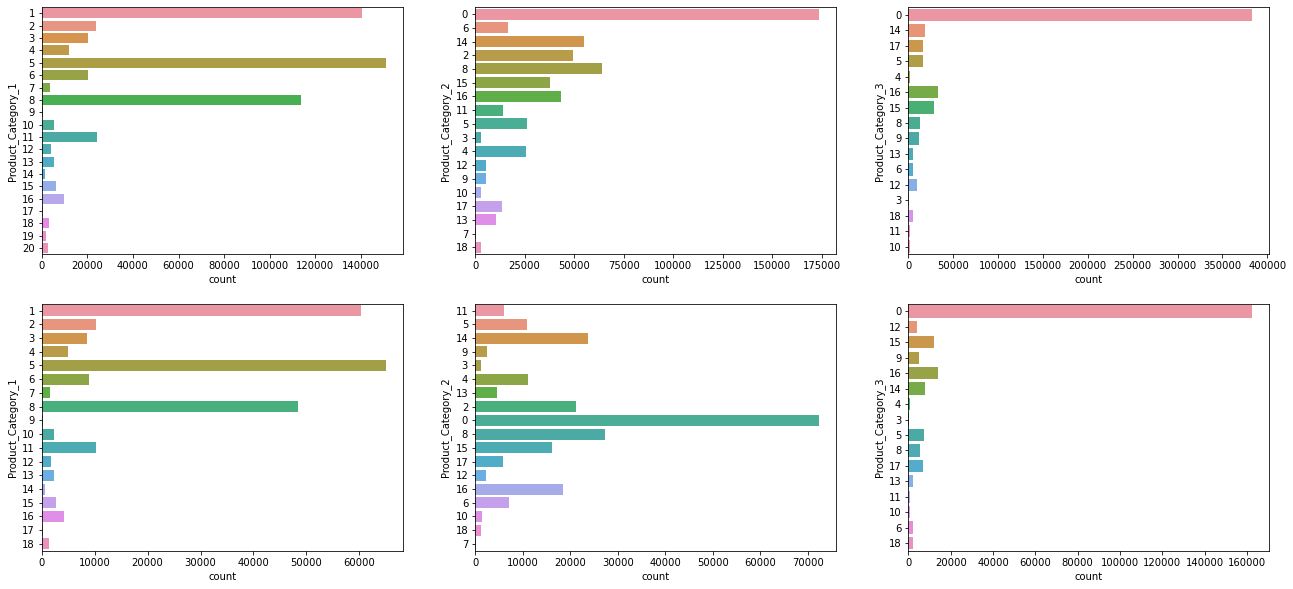

In [19]:
plt.figure(figsize=(22,10))
plt.subplot(231)
sns.countplot(y=train.Product_Category_1)

plt.subplot(232)
sns.countplot(y=train.Product_Category_2)

plt.subplot(233)
sns.countplot(y=train.Product_Category_3)

plt.subplot(234)
sns.countplot(y=test.Product_Category_1)

plt.subplot(235)
sns.countplot(y=test.Product_Category_2)

plt.subplot(236)
sns.countplot(y=test.Product_Category_3)
plt.show()

# It may seem that train and test plot are the same but looking at the range thy both are diffrent

In [20]:
test.Product_Category_3.value_counts()

0     162562
16     13833
15     11955
14      7855
5       7141
17      7116
8       5299
9       4953
12      3869
13      2390
6       1998
18      1992
4        816
11       780
10       775
3        265
Name: Product_Category_3, dtype: int64

In [21]:
train.Product_Category_3.value_counts()

0     383247
16     32636
15     28013
14     18428
17     16702
5      16658
8      12562
9      11579
12      9246
13      5459
6       4890
18      4629
4       1875
11      1805
10      1726
3        613
Name: Product_Category_3, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

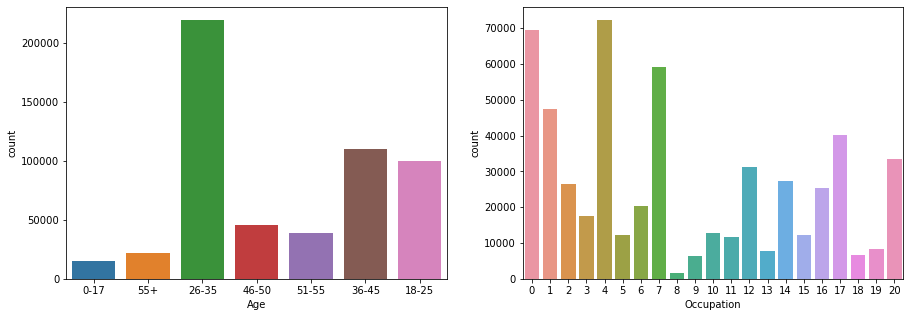

In [22]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(train['Age'])
plt.subplot(122)
sns.countplot(train['Occupation'])

* As expected, children shop the least, and the Adult category ('26-35','36-45','18-25') shop the most. Adult3 ('46-50') also can be categorized as old and hence shop least along with old1 and old2
* Occupations 4,0,7 shop the most, while occupation 8 shops considerably low

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

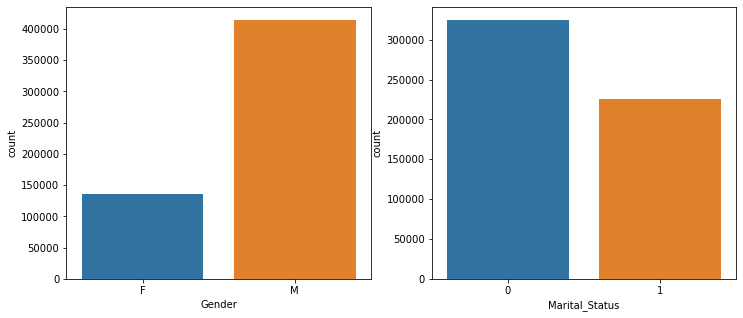

In [23]:
plt.figure(figsize=(12,5))

plt.subplot(121)
sns.countplot(train['Gender'])
plt.subplot(122)
sns.countplot(train['Marital_Status'])

* Maximum shoppers are males,(quite surprised)
* Unmarried shoppers are more

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City_Category', ylabel='count'>

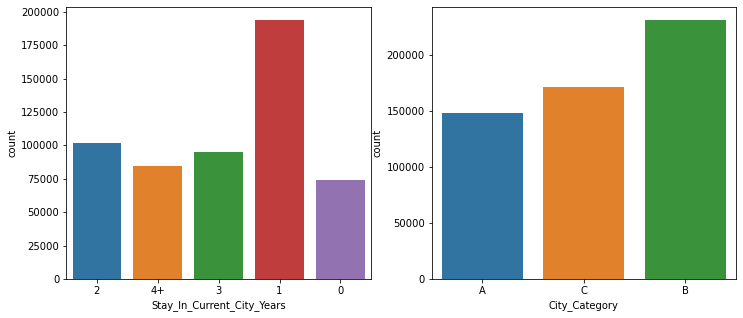

In [24]:
plt.figure(figsize=(12,5))

plt.subplot(121)
sns.countplot(train['Stay_In_Current_City_Years'])
plt.subplot(122)
sns.countplot(train['City_Category'])

* Maximum shoppers in City category B
* Maximum shoppers are ones who have been staying in the city for an year

# Target Exploration

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


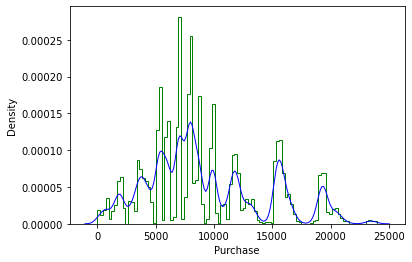

In [25]:
sns.distplot(train['Purchase'],kde_kws={"color": "b", "lw": 1, "label": "KDE"},

                  hist_kws={"histtype": "step", "linewidth": 1,

                            "alpha": 1, "color": "g"},bins=100)
plt.show()

We can draw an intution that after 10000 there is a multimodal distribution and  below that it is random, looking at the distribution

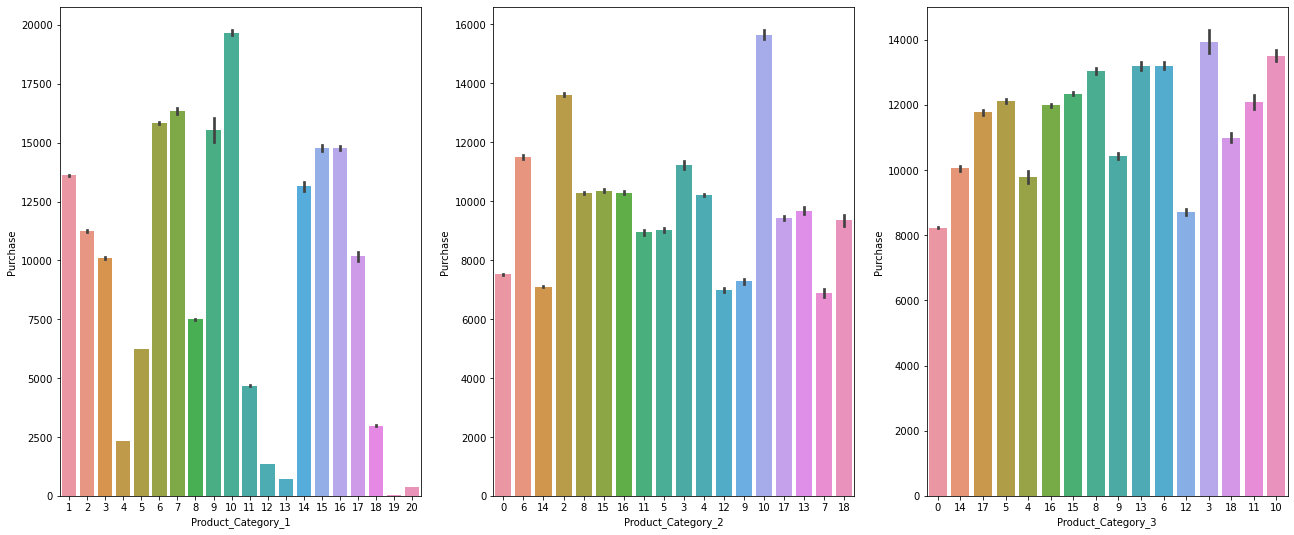

In [26]:
plt.figure(figsize=(22,9))

plt.subplot(131)
sns.barplot(y=train['Purchase'],x=train['Product_Category_1'])

plt.subplot(132)
sns.barplot(y=train['Purchase'],x=train['Product_Category_2'])

plt.subplot(133)
sns.barplot(y=train['Purchase'],x=train['Product_Category_3'])

plt.show()

In [27]:
train.iloc[train.Product_ID.value_counts(sort=True)].head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1880,1000302,P00192742,M,18-25,4,B,4+,0,11,16,0,2949
1615,1000261,P00214442,M,26-35,20,A,4+,0,8,0,0,6179
1612,1000261,P00111042,M,26-35,20,A,4+,0,15,0,0,20800
1562,1000252,P00144642,M,26-35,12,C,3,0,1,15,16,7723
1470,1000238,P00295542,F,51-55,7,B,0,0,8,0,0,7973
1440,1000235,P00280742,M,26-35,0,B,0,0,6,8,0,19976
1438,1000235,P00053642,M,26-35,0,B,0,0,7,0,0,20273
1422,1000230,P00173842,M,46-50,1,C,1,0,1,2,15,19190
1406,1000229,P00367042,M,18-25,10,C,1,0,8,0,0,8114
1406,1000229,P00367042,M,18-25,10,C,1,0,8,0,0,8114


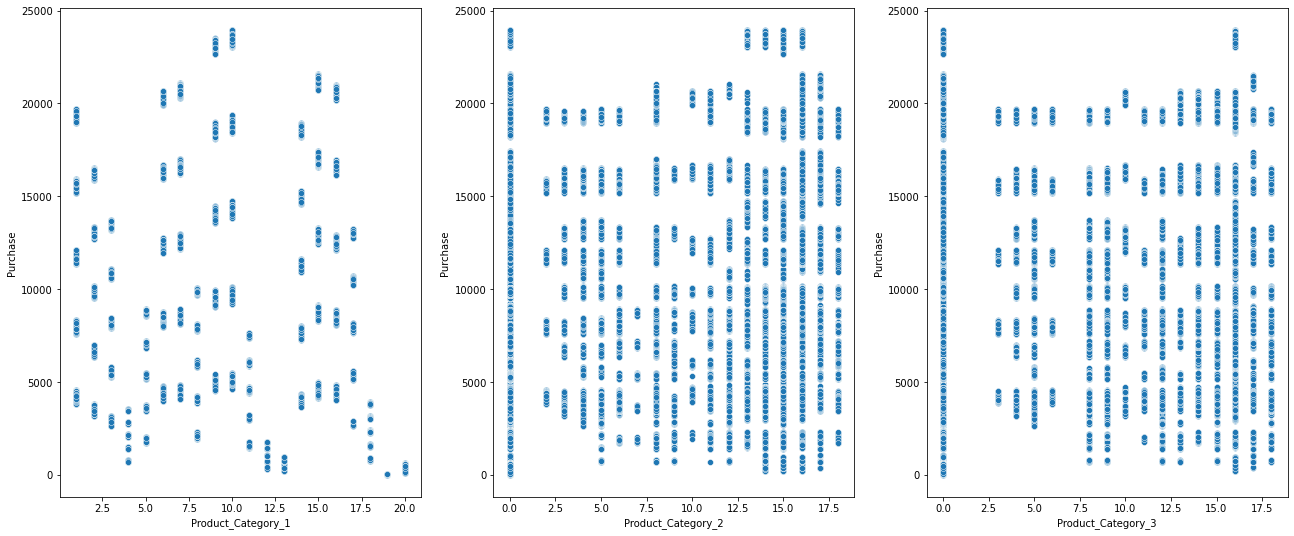

In [28]:
plt.figure(figsize=(22,9))

plt.subplot(131)
sns.scatterplot(y=train['Purchase'],x=train['Product_Category_1'].astype('float64'))

plt.subplot(132)
sns.scatterplot(y=train['Purchase'],x=train['Product_Category_2'].astype('float64'))

plt.subplot(133)
sns.scatterplot(y=train['Purchase'],x=train['Product_Category_3'].astype('float64'))

plt.show()

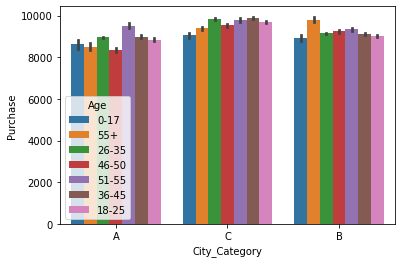

In [29]:
sns.barplot(hue='Age',y = 'Purchase',x='City_Category',data=train)
plt.show()

Highest purchases are of old1 and old2 people in city A and B type while in C type there is no such trend

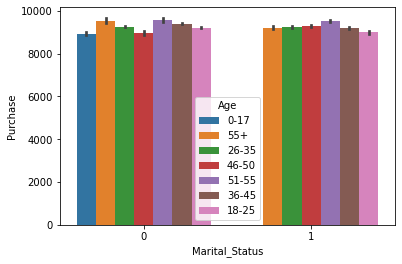

In [30]:
sns.barplot(hue='Age',y = 'Purchase',x='Marital_Status',data=train)
plt.show()

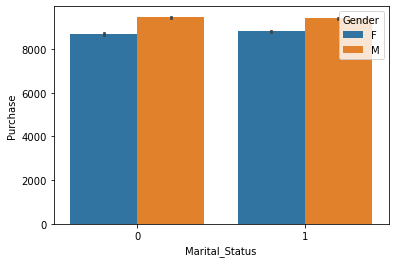

In [31]:
sns.barplot(hue='Gender',y = 'Purchase',x='Marital_Status',data=train)
plt.show()

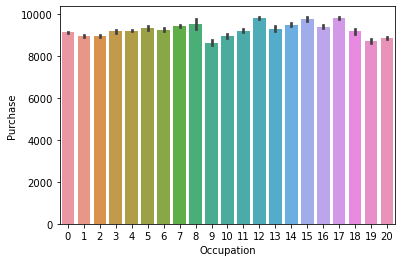

In [32]:
sns.barplot(y = 'Purchase',x='Occupation',data=train)
plt.show()

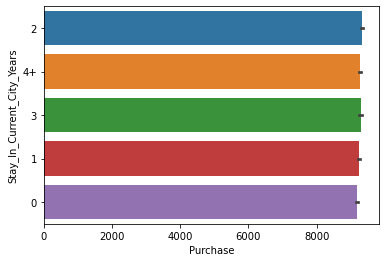

In [33]:
sns.barplot(x = 'Purchase',y='Stay_In_Current_City_Years',data=train)
plt.show()

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [36]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].map({'4+':'4'})

In [37]:
feat1 = ["Gender", "Age", "Occupation", "City_Category",
       "Stay_In_Current_City_Years"]
encoder1 = LabelEncoder()
for f1 in feat1:
    train[f1] = encoder1.fit_transform(train[f1].astype('str'))

In [38]:
feat2 = ['Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']
for f2 in feat2:
    train[f2] = train[f2].astype('int32')

In [39]:
train_grouped = train.copy()
train_grouped['Frequency_prod'] = 1
train_grouped['Product_Score'] = 0.0

In [40]:
train_grouped_prod = train_grouped.groupby(['Product_ID']).sum()

train_grouped_prod.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Frequency_prod,Product_Score
Product_ID,,,,,,,,,,,,,
P00000142,1155549402,805,2600,10653,1359,996,435,3456,4608,5760,12837476,1152,0.0
P00000242,377161644,285,863,3395,405,319,140,752,1504,3384,3967496,376,0.0
P00000342,244674888,175,614,2192,258,213,97,1220,3416,0,1296475,244,0.0
P00000442,92284575,46,204,866,74,76,38,460,736,0,441173,92,0.0
P00000542,149492005,99,327,1505,140,123,46,745,0,0,807212,149,0.0


In [41]:
max_freq_prod = train_grouped_prod.Frequency_prod.max()
train_grouped_prod['Product_Score'] = train_grouped_prod['Frequency_prod'].apply(lambda x: float(x)/float(max_freq_prod))
train_grouped_prod = train_grouped_prod.reset_index()
train_grouped_prod['Product_Score'].head()

0    0.612766
1    0.200000
2    0.129787
3    0.048936
4    0.079255
Name: Product_Score, dtype: float64

In [42]:

train_grouped['Frequency_user'] = 1
train_grouped['User_Score'] = 0.0
train_grouped_user = train_grouped.groupby(['User_ID']).sum()
train_grouped_user.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Frequency_prod,Product_Score,Frequency_user,User_Score
User_ID,,,,,,,,,,,,,,
1000001,0,0,70,0,35,0,213,132,148,334093,35,0.0,35,0.0
1000002,77,462,616,154,0,0,354,539,359,810472,77,0.0,77,0.0
1000003,29,58,203,0,29,0,93,117,148,341635,29,0.0,29,0.0
1000004,14,56,252,14,14,14,33,102,127,206468,14,0.0,14,0.0
1000005,106,212,1378,0,106,106,659,642,207,821001,106,0.0,106,0.0


In [43]:
max_freq_user = train_grouped_user.Frequency_user.max()
train_grouped_user['User_Score'] = train_grouped_user['Frequency_user'].apply(lambda x: float(x)/float(max_freq_user))
train_grouped_user = train_grouped_user.reset_index()
train_grouped_user['User_Score'].head()


0    0.034113
1    0.075049
2    0.028265
3    0.013645
4    0.103314
Name: User_Score, dtype: float64

In [44]:
train_new = train.copy()

In [48]:
for ix,row in train_new.iterrows():
    p_score = train_grouped_prod.loc[train_grouped_prod['Product_ID']==row['Product_ID'],'Product_Score'].values[0]
    train_new.at[ix,'Product_score'] = p_score

In [49]:
for ix,row in train_new.iterrows():
    u_score = train_grouped_user.loc[train_grouped_user['User_ID']==row['User_ID'],'User_Score'].values[0]
    train_new.at[ix,'User_score'] = u_score

In [50]:
train_new.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_score,User_score
0,1000001,P00069042,0,0,2,0,1,0,3,0,0,8370,0.120745,0.034113
1,1000001,P00248942,0,0,2,0,1,0,1,6,14,15200,0.309043,0.034113
2,1000001,P00087842,0,0,2,0,1,0,12,0,0,1422,0.054255,0.034113
3,1000001,P00085442,0,0,2,0,1,0,12,14,0,1057,0.181383,0.034113
4,1000002,P00285442,1,6,8,2,0,0,8,0,0,7969,0.107979,0.075049


In [51]:
train_new.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Product_score',
       'User_score'],
      dtype='object')

sns.heatmap(annot=True,data=train.drop('Product_ID',axis=1))
plt.show()

In [52]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int32  
 8   Product_Category_1          550068 non-null  int32  
 9   Product_Category_2          550068 non-null  int32  
 10  Product_Category_3          550068 non-null  int32  
 11  Purchase                    550068 non-null  int64  
 12  Product_score               550068 non-null  float64
 13  User_score    

In [53]:
train_new.corr()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_score,User_score
User_ID,1.000000,-0.033474,0.032698,-0.010380,0.022859,0.019567,0.020443,0.003825,0.003896,0.003605,0.004716,0.003688,-0.032458
Gender,-0.033474,1.000000,-0.004262,-0.013210,-0.004515,-0.027125,-0.011603,-0.045594,-0.000954,0.036146,0.060346,0.020456,0.073517
Age,0.032698,-0.004262,1.000000,-0.029619,0.123079,-0.002666,0.311738,0.061197,0.018770,-0.007422,0.015839,-0.020741,-0.060446
Occupation,-0.010380,-0.013210,-0.029619,1.000000,-0.042639,-0.001763,-0.020608,-0.005723,-0.001034,-0.002551,0.002666,0.000573,0.050794
City_Category,0.022859,-0.004515,0.123079,-0.042639,1.000000,-0.012357,0.039790,-0.014364,0.016003,0.035525,0.061914,0.109546,-0.522198
Stay_In_Current_City_Years,0.019567,-0.027125,-0.002666,-0.001763,-0.012357,1.000000,0.006782,-0.006624,-0.000846,0.002331,-0.000988,0.002282,-0.006629
Marital_Status,0.020443,-0.011603,0.311738,-0.020608,0.039790,0.006782,1.000000,0.019888,0.001099,-0.004629,-0.000463,-0.010415,0.000678
Product_Category_1,0.003825,-0.045594,0.061197,-0.005723,-0.014364,-0.006624,0.019888,1.000000,-0.067877,-0.385534,-0.343703,-0.205178,0.017748
Product_Category_2,0.003896,-0.000954,0.018770,-0.001034,0.016003,-0.000846,0.001099,-0.067877,1.000000,0.094750,0.052288,0.098062,-0.027482
Product_Category_3,0.003605,0.036146,-0.007422,-0.002551,0.035525,0.002331,-0.004629,-0.385534,0.094750,1.000000,0.288501,0.262332,-0.050203


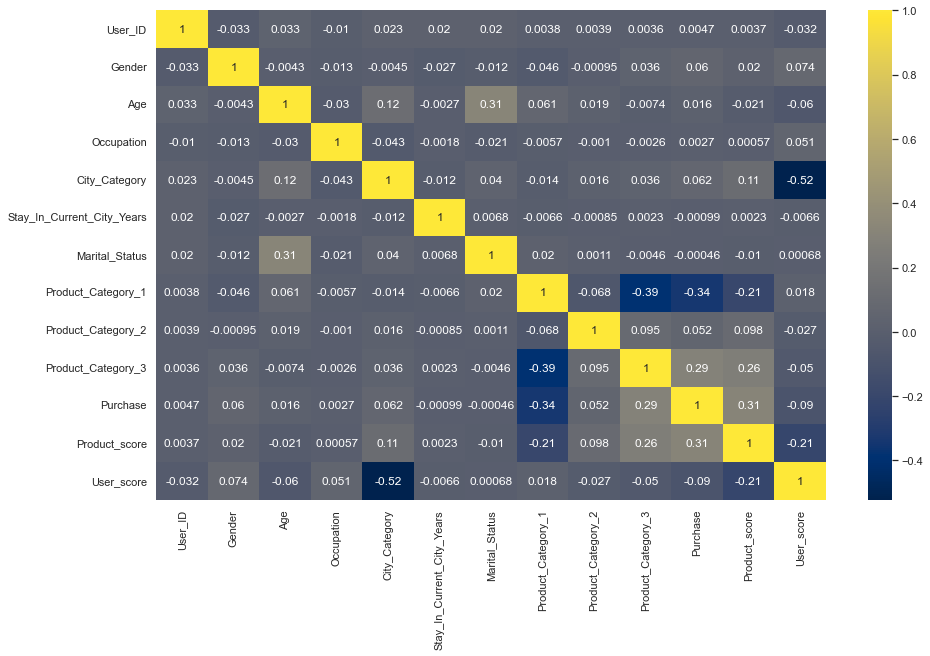

In [54]:
sns.set(rc={'figure.figsize':(15,9)})
sns.heatmap(train_new.corr(),annot=True,cmap='cividis')
plt.show()

# Model Building

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

In [57]:
scaler = StandardScaler()

In [58]:
def model_cv_score(model,data,target,randomstate):
    i=1;
    train_score = []
    test_score = []
    kf = KFold(n_splits=10,random_state=randomstate)
    for trian_ix,test_ix in kf.split(data):
        
        print("{} of Fold {}".format(i,kf.get_n_splits(data)))
        
        X_train, X_test = data.iloc[trian_ix], data.iloc[test_ix]
        y_train, y_test = target.iloc[trian_ix], target.iloc[test_ix]   
        '''
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        '''
        
        modelfit = model.fit(X_train,y_train)
        mse_train = mean_squared_error(y_true=y_train,y_pred=modelfit.predict(X_train))
        mse_test = mean_squared_error(y_true=y_test,y_pred=modelfit.predict(X_test))
        
        train_score.append(np.sqrt(mse_train))
        test_score.append(np.sqrt(mse_test))
        print("Train score: {}\nTest score: {}".format(np.sqrt(mse_train),np.sqrt(mse_test)))
        i += 1
    return train_score,test_score


In [59]:
def LOO_score(model,data,target,randomstate):
    i=1;
    train_score = []
    test_score = []
    kf = KFold(n_splits=10,random_state=randomstate)
    for trian_ix,test_ix in kf.split(data):
        
        print("{} of Fold {}".format(i,kf.get_n_splits(data)))
        
        X_train, X_test = data.iloc[trian_ix], data.iloc[test_ix]
        y_train, y_test = target.iloc[trian_ix], target.iloc[test_ix]   
        '''
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        '''
        
        modelfit = model.fit(X_train,y_train)
        mse_train = mean_squared_error(y_true=y_train,y_pred=modelfit.predict(X_train))
        mse_test = mean_squared_error(y_true=y_test,y_pred=modelfit.predict(X_test))
        
        train_score.append(np.sqrt(mse_train))
        test_score.append(np.sqrt(mse_test))
        print("Train score: {}\nTest score: {}".format(np.sqrt(mse_train),np.sqrt(mse_test)))
        i += 1
    return train_score,test_score


In [60]:
df = train.drop(['Purchase','User_ID','Product_ID'],axis=1)
target = train['Purchase']
target.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

BaseLine Model: Taking the mean

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor

In [62]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df,target,random_state=42,test_size=0.2)

In [63]:
basemodel = DummyRegressor(strategy='mean')
basemodel.fit(Xtrain,ytrain)

DummyRegressor()

In [64]:
print("Baseline Train Score: {}".format(np.sqrt(mean_squared_error(y_true=ytrain,y_pred=basemodel.predict(Xtrain)))))

Baseline Train Score: 5025.66831397282


In [65]:
print("Baseline Test Score: {}".format(np.sqrt(mean_squared_error(y_true=ytest,y_pred=basemodel.predict(Xtest)))))

Baseline Test Score: 5012.621181345433


In [66]:
from sklearn.model_selection import validation_curve


In [67]:
test_list = ytest.tolist()
pred_list = basemodel.predict(Xtest).tolist()

In [68]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [69]:
linearReg = LinearRegression(normalize=True)

In [70]:
train_score_lin,test_score_lin = model_cv_score(linearReg,df,target=target,randomstate=None)

1 of Fold 10
Train score: 4628.931082050113
Test score: 4590.972246112181
2 of Fold 10


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

Train score: 4622.281889352127
Test score: 4650.885451087818
3 of Fold 10
Train score: 4622.532395746981
Test score: 4648.633791535564
4 of Fold 10
Train score: 4626.297898661343
Test score: 4614.9765661867195
5 of Fold 10


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

Train score: 4624.4781322232375
Test score: 4631.238454263392
6 of Fold 10
Train score: 4623.074660642035
Test score: 4643.917075396112
7 of Fold 10
Train score: 4625.405805744688
Test score: 4622.862366964465
8 of Fold 10


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

Train score: 4622.759257195235
Test score: 4646.764614579887
9 of Fold 10
Train score: 4621.655046558237
Test score: 4656.613348711596
10 of Fold 10
Train score: 4632.2948995778115
Test score: 4576.638686571816


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

In [71]:
X_train,X_test,y_train,y_test  = train_test_split(df,target,test_size=0.2,random_state=42)

In [72]:
linearReg = LinearRegression(normalize=True)
linearReg.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [73]:
yp = linearReg.predict(X_test)
np.sqrt(mean_squared_error(y_true=y_test,y_pred=yp))

4618.931198924126

Text(0.5, 1.0, 'Coefficient plot')

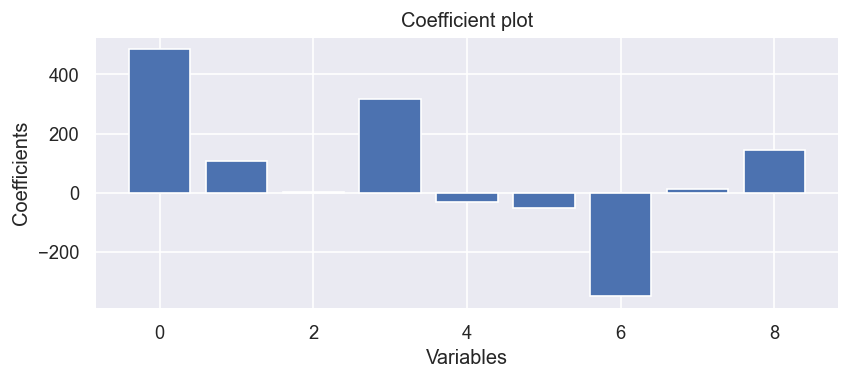

In [74]:
plt.figure(figsize=(8, 3), dpi=120, facecolor='w', edgecolor='r')
x = range(len(X_train.columns))
y = linearReg.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [75]:
Coefficient = pd.DataFrame({
    'Variables': X_train.columns,
    'Coeffcient': linearReg.coef_
})
Coefficient

,Variables,Coeffcient
0,Gender,485.321293
1,Age,107.692215
2,Occupation,4.073136
3,City_Category,317.055693
4,Stay_In_Current_City_Years,-30.523632
5,Marital_Status,-49.731291
6,Product_Category_1,-348.385878
7,Product_Category_2,13.026019
8,Product_Category_3,144.115162


var_sig = Coefficient[ Coefficient.Coeffcient > 50 ]

subset_tr = X_train[var_sig['Variables'].values]
subset_tr.head()

subset_ts = X_test[var_sig['Variables'].values]
subset_ts.head()

linearReg.fit(subset_tr,y_train)
np.sqrt(mean_squared_error(y_true=y_test,y_pred=linearReg.predict(subset_ts)))

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_ridge = [0.001, 0.08, 0.05, 0.1, 0.8, 0.5, 1, 1.05, 1.1, 1.5, 2, 2.5, 3, 4, 5]
param_lasso = [0.005, 0.002, 0.001, 0.08, 0.05, 0.1, 0.8,0.5, 1]

In [78]:
ridReg = Ridge(alpha=0.5)
train_score_rid,test_score_rid = model_cv_score(ridReg,df,target=target,randomstate=None)

1 of Fold 10
Train score: 4628.931082050273
Test score: 4590.972251700453
2 of Fold 10
Train score: 4622.28188935229
Test score: 4650.8854466345265
3 of Fold 10
Train score: 4622.53239574714
Test score: 4648.633795679959
4 of Fold 10
Train score: 4626.2978986615135
Test score: 4614.976548426279
5 of Fold 10
Train score: 4624.478132223398
Test score: 4631.238461473482
6 of Fold 10
Train score: 4623.074660642198
Test score: 4643.917071451554
7 of Fold 10
Train score: 4625.405805744849
Test score: 4622.862370342403
8 of Fold 10
Train score: 4622.759257195395
Test score: 4646.7646161416405
9 of Fold 10
Train score: 4621.655046558397
Test score: 4656.613351751627
10 of Fold 10
Train score: 4632.294899577982
Test score: 4576.638683590621


In [79]:
lasReg = Lasso(alpha=5)
train_score_las,test_score_las = model_cv_score(lasReg,df,target=target,randomstate=None)

1 of Fold 10
Train score: 4628.969715639221
Test score: 4591.105939959912
2 of Fold 10
Train score: 4622.322794082876
Test score: 4650.788713183121
3 of Fold 10
Train score: 4622.573841868446
Test score: 4648.759022002912
4 of Fold 10
Train score: 4626.337461519057
Test score: 4614.762457454414
5 of Fold 10
Train score: 4624.518770766166
Test score: 4631.3609105831065
6 of Fold 10
Train score: 4623.118091875835
Test score: 4643.911042106676
7 of Fold 10
Train score: 4625.448736563169
Test score: 4622.927773830502
8 of Fold 10
Train score: 4622.796103486351
Test score: 4646.841123798436
9 of Fold 10
Train score: 4621.697372260421
Test score: 4656.701660260795
10 of Fold 10
Train score: 4632.334959031508
Test score: 4576.739426281442


In [87]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import xgboost as xg
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

In [83]:
lasReg = Lasso()
lasReg.fit(X_train,y_train)
yp_las = lasReg.predict(X_test)
np.sqrt(mean_squared_error(y_true=y_test,y_pred=yp_las))

4618.923268353795

In [84]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
yp_gbr = gbr.predict(X_test)
np.sqrt(mean_squared_error(y_true=y_test,y_pred=yp_gbr))

2999.928741504557

In [85]:
params_xgb_rcv = {'n_estimators': [500, 1000],
              'gamma':[float(i)/10.0 for i in range(3,5)],  
              'subsample':[float(i)/10.0 for i in range(6,11)], 
              'max_depth': [5, 10, 15],
              'learning_rate':[float(i)/10.0 for i in range(0,1)]}

In [ ]:
xgb = xg.XGBRegressor(objective='reg:squarederror',
                    random_state=0) 
RCV_xgb = RandomizedSearchCV(xgb,param_distributions=params_xgb_rcv,cv=10)
RCV_xgb.fit(X_train,y_train)

In [ ]:
GSCV_gbr.besr_params_